In [99]:
import numpy as np
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = json.load(open('train.json'))

In [20]:
n_topics = len(data['data'])
topics = []
for i in range(n_topics):
    topics.append(data['data'][i]['title'])

In [31]:
#print data['data'][0]['paragraphs'][0]
print n_topics
f = open('topics.csv','wb')

for topic in topics:
    #f.write( topic.encode('utf-8')+"\n")
    f.write(re.sub(r'[^a-zA-Z0-9-_]','', topic)+"\n")
f.close()

442


In [44]:
topics_paragraphs = {}
for i in range(n_topics):
     topics_paragraphs[data['data'][i]['title']] = len(data['data'][i]['paragraphs'])

In [48]:
l = sorted(topics_paragraphs.items(), key=lambda x: x[1], reverse=True)
f = open('topics_paragraphs_count.csv','wb')
for topic in l:
    f.write(re.sub(r'[^a-zA-Z0-9-_]','', topic[0])+","+str(topic[1])+"\n")
f.close()

In [74]:
print data['data'][5]['paragraphs'][0]['qas']

[{u'question': u"What was Fr\xe9d\xe9ric's nationalities?", u'id': u'56cbd2356d243a140015ed66', u'answers': [{u'text': u'Polish and French', u'answer_start': 182}]}, {u'question': u'In what era was Fr\xe9d\xe9ric active in?', u'id': u'56cbd2356d243a140015ed67', u'answers': [{u'text': u'Romantic era', u'answer_start': 276}]}, {u'question': u'For what instrument did Fr\xe9d\xe9ric write primarily for?', u'id': u'56cbd2356d243a140015ed68', u'answers': [{u'text': u'solo piano', u'answer_start': 318}]}, {u'question': u'In what area was Fr\xe9d\xe9ric born in?', u'id': u'56cbd2356d243a140015ed69', u'answers': [{u'text': u'Duchy of Warsaw', u'answer_start': 559}]}, {u'question': u'At what age did Fr\xe9d\xe9ric depart from Poland?', u'id': u'56cbd2356d243a140015ed6a', u'answers': [{u'text': u'20', u'answer_start': 777}]}, {u'question': u'What year was Chopin born?', u'id': u'56ce0a3762d2951400fa69d6', u'answers': [{u'text': u'1810', u'answer_start': 113}]}, {u'question': u'What era was Chopin

In [133]:
questions_lengths = []
answer_lengths = []
context_lengths = []

for i in range(n_topics):
    number_of_paragraphs = len(data['data'][i]['paragraphs'])
    for para_index in range(number_of_paragraphs):
        paragraph = data['data'][i]['paragraphs'][para_index]
        context_lengths.append(len(paragraph['context'].split(" ")))
        for question_index in range(len(paragraph['qas'])):
            questions_lengths.append(len(paragraph['qas'][question_index]['question'].split(" ")))
            answers = paragraph['qas'][question_index]['answers']
            for answer_index in range(len(answers)):
                answer_lengths.append(len(answers[answer_index]['text'].split(" ")))


In [89]:
print len(answer_lengths), len(questions_lengths), len(context_lengths)

87599 87599 18896


In [94]:
f = open('context_lengths.csv','wb')
for context_len in context_lengths:
    f.write(str(context_len)+"\n")
f.close()

In [143]:
def draw_hist(y,x_label,y_label,title, b = 100):
    plt.hist(y, normed = False, bins = b)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.savefig('context_hist.png')
    plt.show()
    plt.close()

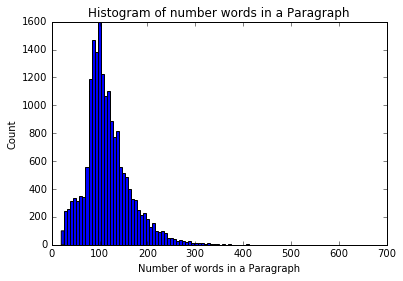

In [144]:
draw_hist(context_lengths,"Number of words in a Paragraph","Count","Histogram of number words in a Paragraph")

In [126]:
print max(questions_lengths)
plt.show()


25601


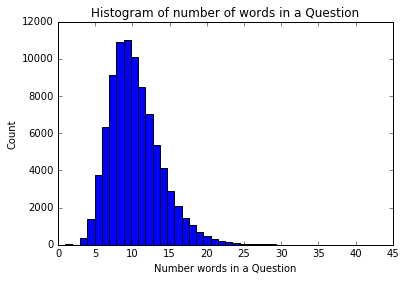

In [147]:
plt.hist(questions_lengths, normed = False, bins = 40)

plt.ylabel("Count")
plt.xlabel("Number words in a Question")
plt.title("Histogram of number of words in a Question")
plt.savefig("question_hist.png")
plt.show()


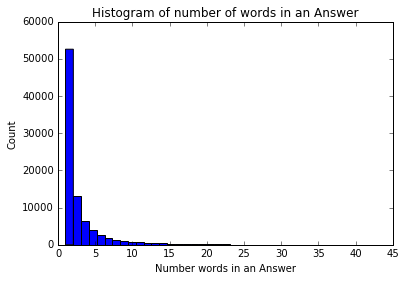

In [151]:
plt.hist(answer_lengths, normed = False, bins = 40)
plt.ylabel("Count")
plt.xlabel("Number words in an Answer")
plt.title("Histogram of number of words in an Answer")
plt.savefig("answer_hist.png")
plt.show()

In [152]:
max(context_lengths)

653

In [153]:
dev_data = json.load(open('dev.json'))

In [169]:
dev_n_topics = len(dev_data['data'])
dev_topics = []
for i in range(dev_n_topics):
    dev_topics.append(dev_data['data'][i]['title'])

In [173]:
dev_questions_lengths = []
dev_answer_lengths = []
dev_context_lengths = []

for i in range(dev_n_topics):
    number_of_paragraphs = len(dev_data['data'][i]['paragraphs'])
    for para_index in range(number_of_paragraphs):
        paragraph = dev_data['data'][i]['paragraphs'][para_index]
        dev_context_lengths.append(len(paragraph['context'].split(" ")))
        for question_index in range(len(paragraph['qas'])):
            dev_questions_lengths.append(len(paragraph['qas'][question_index]['question'].split(" ")))
            answers = paragraph['qas'][question_index]['answers']
            for answer_index in range(len(answers)):
                dev_answer_lengths.append(len(answers[answer_index]['text'].split(" ")))

In [180]:
dev_data['data'][0]

{u'paragraphs': [{u'context': u'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24\u201310 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.',
   u'qas': [{u'answers': [{u'answer_start': 177, u'text': u'Denver Broncos'},
      {u'answer_start': 177, u'text': u'Denver Broncos'},
      {u'answer_start': 177, u'text': u'Denver B